In [ ]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('C:\Users\himel\Desktop\sentiment code\output.csv', delimiter=',', encoding='ISO-8859-1')

# Check the columns in your DataFrame
print(df.head())

In [ ]:
df.columns = ['Sentiment','id','date','query','user','text']
df.head()

In [ ]:
df = df[['Sentiment','text']]

In [41]:
df.columns

Index(['Sentiment', 'text'], dtype='object')

In [42]:
df.Sentiment.value_counts()

0    799996
4    248576
Name: Sentiment, dtype: int64

In [43]:
df['Sentiment'] = df['Sentiment'].replace({4:1})

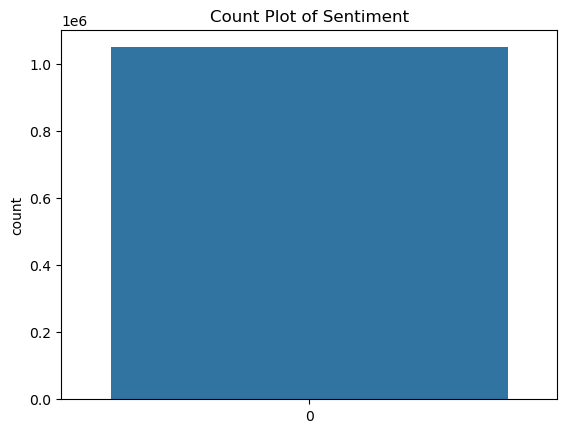

In [44]:
sns.countplot(df["Sentiment"])
plt.title("Count Plot of Sentiment")
plt.show()

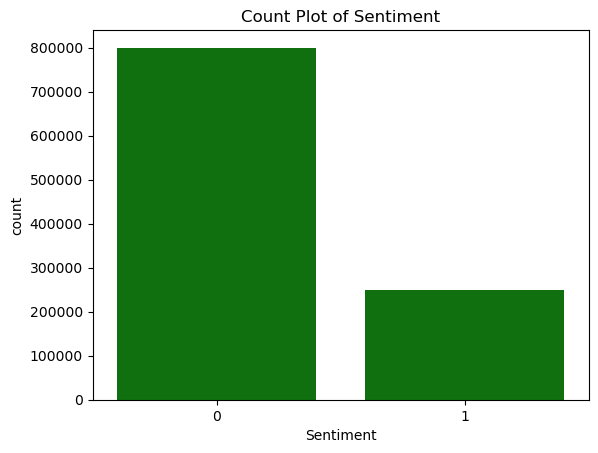

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df["Sentiment"] contains categorical data
sns.countplot(data=df, x="Sentiment", color="green")
plt.title("Count Plot of Sentiment")
plt.show()

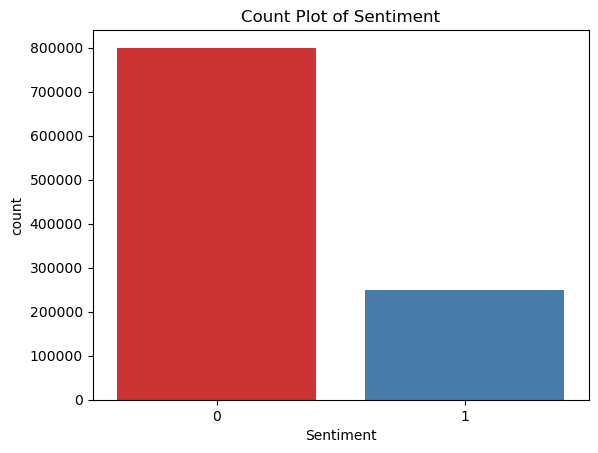

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df["Sentiment"] contains categorical data
sns.countplot(data=df, x="Sentiment", palette="Set1")
plt.title("Count Plot of Sentiment")
plt.show()

In [47]:
from sklearn.utils import resample

In [48]:
## majority class 0
df_majority = df[df['Sentiment']==0]
## minority class 1
df_minority = df[df['Sentiment']==1]

In [49]:
df_minority.shape# downsample the majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,   
                                 n_samples=len(df_minority),    
                                 random_state=1234) 

In [50]:
df = df_majority_downsampled.append(df_minority)
df.head()

,Sentiment,text
74567,0,Wow slept for almost 12hours. Sleepy me!! Uni ...
668722,0,gets bored with an idea too easily ... like tw...
286706,0,To my girls - sorry i've been a homebody latel...
632911,0,BK once again for the weekend...If it wasnt fo...
356735,0,@DonnieWahlberg Now why didn't you do that las...


<function matplotlib.pyplot.show(close=None, block=None)>

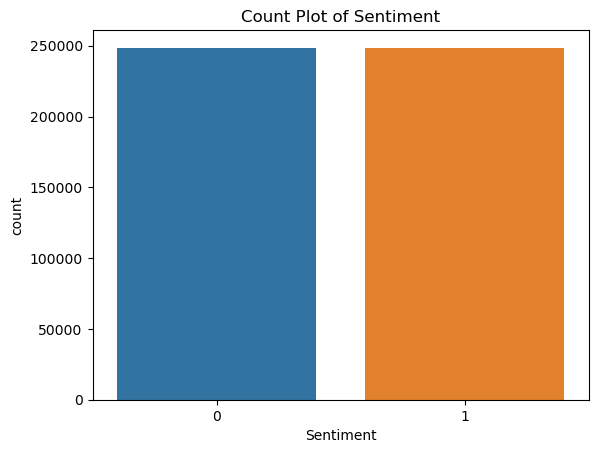

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df["Sentiment"] contains categorical data
sns.countplot(data=df, x="Sentiment")
plt.title("Count Plot of Sentiment")
plt.show

In [52]:


## remove stopwords and punctuation marks
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()

corpus = df['text'].tolist()
print(len(corpus))
print(corpus[0])

497152
Wow slept for almost 12hours. Sleepy me!! Uni now, boo! I wanna stay home, drink tea and watch house... 


In [53]:
%%time
final_corpus = []
final_corpus_joined = []
for i in df.index:

    text = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    #Convert to lowercase
    text = text.lower()
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()

    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text 
            if not word in stuff_to_be_removed] 
    text1 = " ".join(text)
    final_corpus.append(text)
    final_corpus_joined.append(text1)

CPU times: total: 28.4 s
Wall time: 28.5 s


In [54]:
data_cleaned = pd.DataFrame()
data_cleaned["text"] = final_corpus_joined
data_cleaned["Sentiment"] = df["Sentiment"].values

In [55]:
data_cleaned['Sentiment'].value_counts()

0    248576
1    248576
Name: Sentiment, dtype: int64

In [56]:
data_cleaned.head()

,text,Sentiment
0,wow slept almost hour sleepy uni boo wanna sta...,0
1,get bored idea easily like twitter,0
2,girl sorry homebody lately dont feel well does...,0
3,bk weekend wasnt puppy stay as,0
4,donniewahlberg last night atlanta,0


# data_eda = pd.DataFrame()


In [57]:
data_eda = pd.DataFrame()
data_eda['text'] = final_corpus
data_eda['Sentiment'] = df["Sentiment"].values
data_eda.head()

,text,Sentiment
0,"[wow, slept, almost, hour, sleepy, uni, boo, w...",0
1,"[get, bored, idea, easily, like, twitter]",0
2,"[girl, sorry, homebody, lately, dont, feel, we...",0
3,"[bk, weekend, wasnt, puppy, stay, as]",0
4,"[donniewahlberg, last, night, atlanta]",0


In [58]:
# Storing positive data seperately
positive = data_eda[data_eda['Sentiment'] == 1]
positive_list = positive['text'].tolist()

# Storing negative data seperately

negative = data_eda[data_eda['Sentiment'] == 0]
negative_list = negative['text'].tolist()

In [59]:
positive_all = " ".join([word for sent in positive_list for word in sent ])
negative_all = " ".join([word for sent in negative_list for word in sent ])

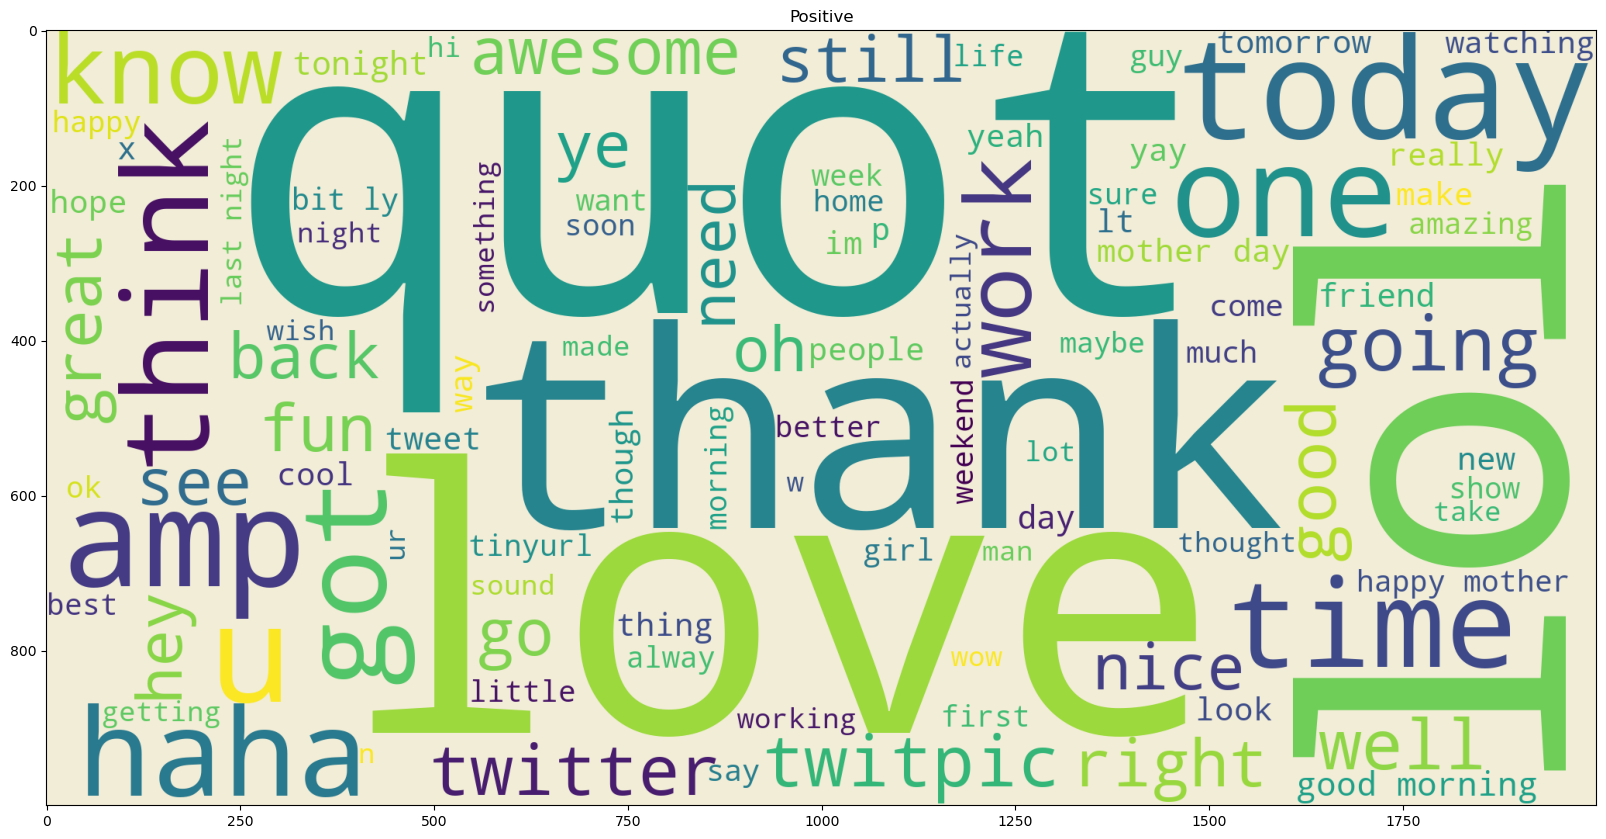

In [60]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='#F2EDD7FF',
                      max_words = 100).generate(positive_all)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("Positive")
plt.show()

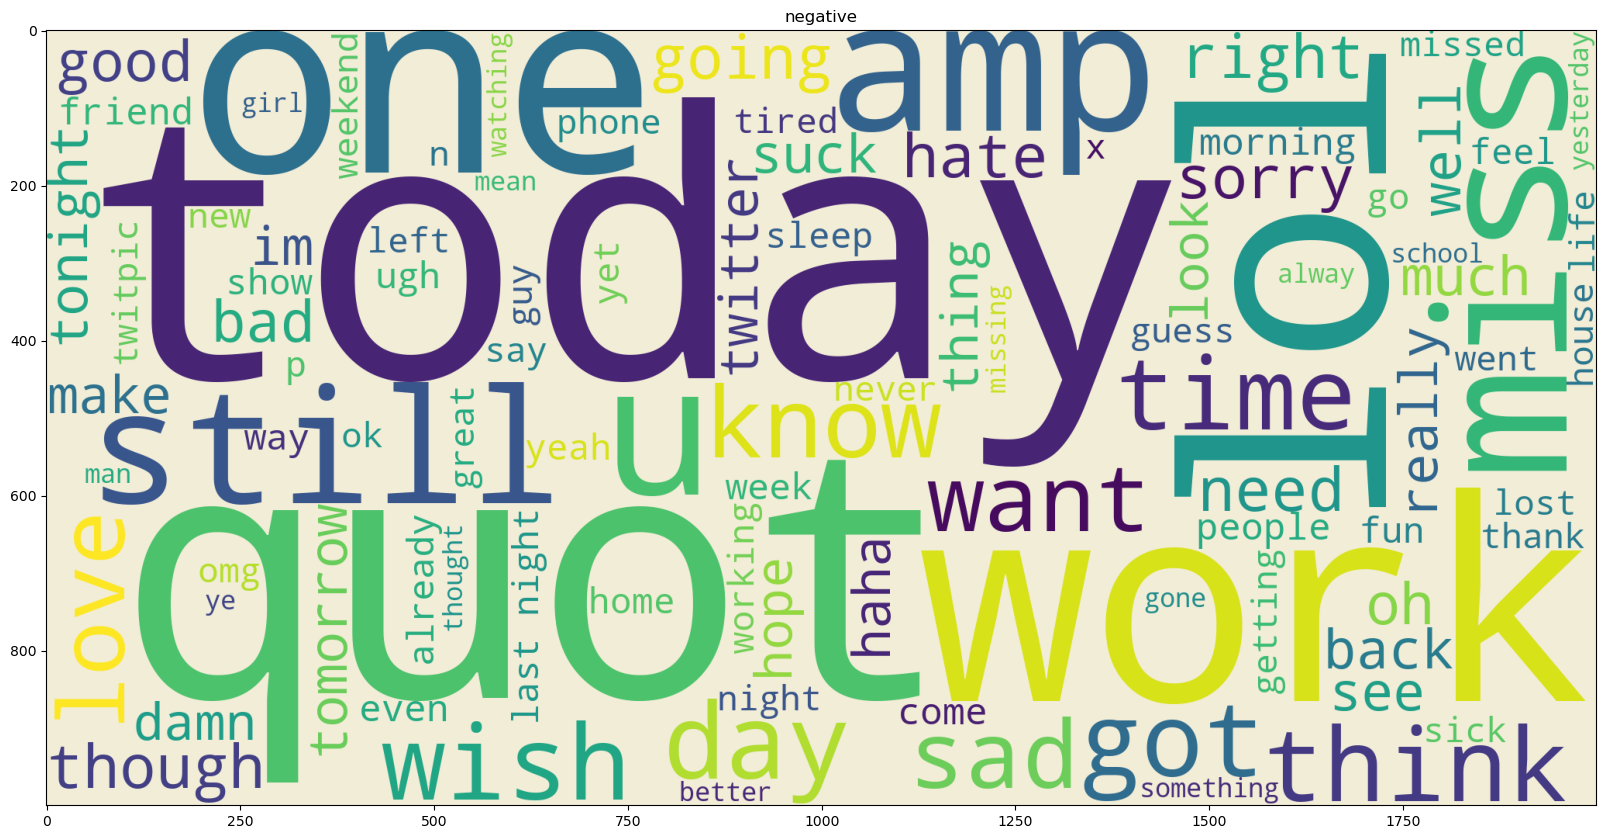

In [61]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='#F2EDD7FF',
                      max_words = 100).generate(negative_all)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("negative")
plt.show()

In [62]:
def get_count(data):
    dic = {}
    for i in data:
        for j in i:
            if j not in dic:
                dic[j]=1
            else:
                dic[j]+=1    
            
    return(dic)
count_corpus = get_count(positive_list)

In [63]:
count_corpus = pd.DataFrame({"word":count_corpus.keys(),"count":count_corpus.values()})
count_corpus = count_corpus.sort_values(by = "count", ascending = False)

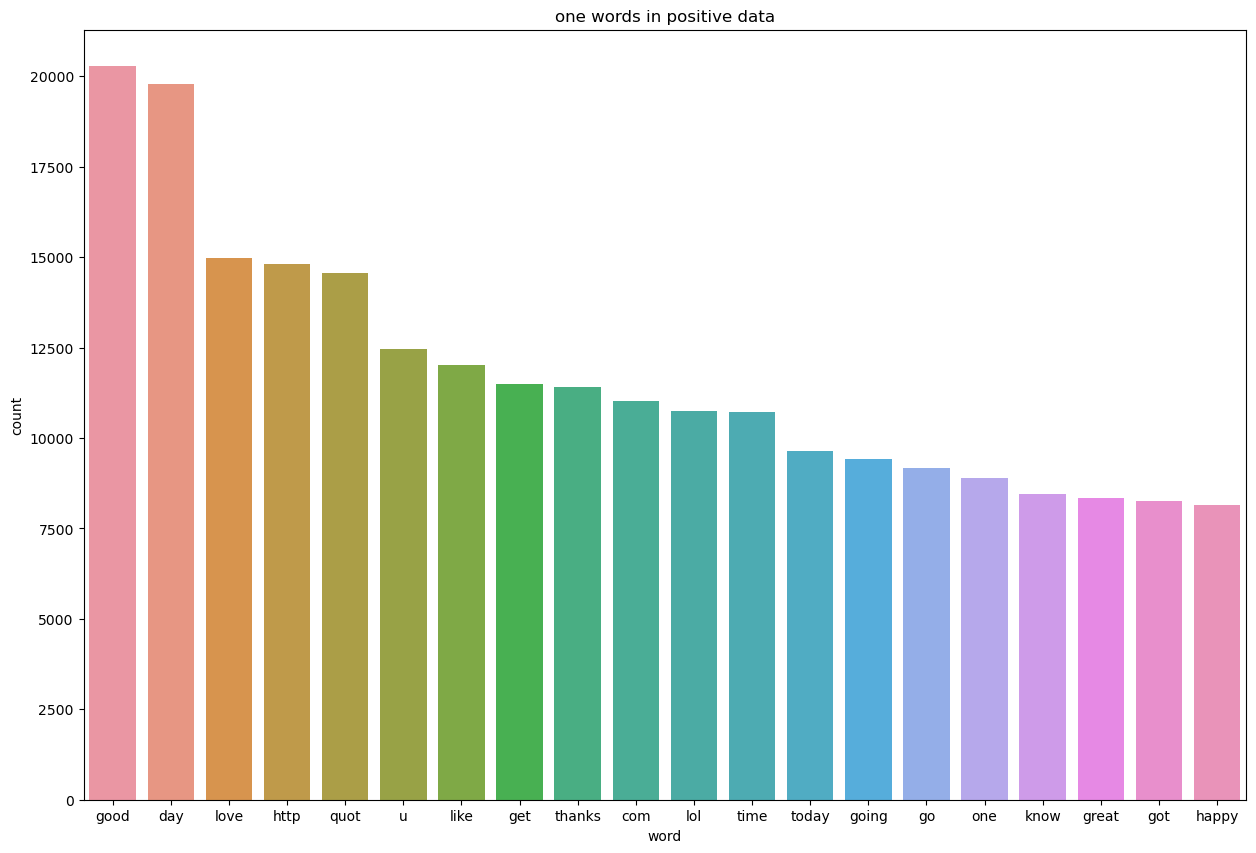

In [64]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x = count_corpus["word"][:20], y = count_corpus["count"][:20])
plt.title('one words in positive data')
plt.show()

In [65]:
def get_count(data):
    dic = {}
    for i in data:
        for j in i:
            if j not in dic:
                dic[j]=1
            else:
                dic[j]+=1    
            
    #dic = dict(sorted(dic.items() , key = lambda x:x[1],reverse=True))
    return(dic)
count_corpus = get_count(negative_list)

In [66]:
count_corpus = pd.DataFrame({"word":count_corpus.keys(),"count":count_corpus.values()})
count_corpus = count_corpus.sort_values(by = "count", ascending = False)

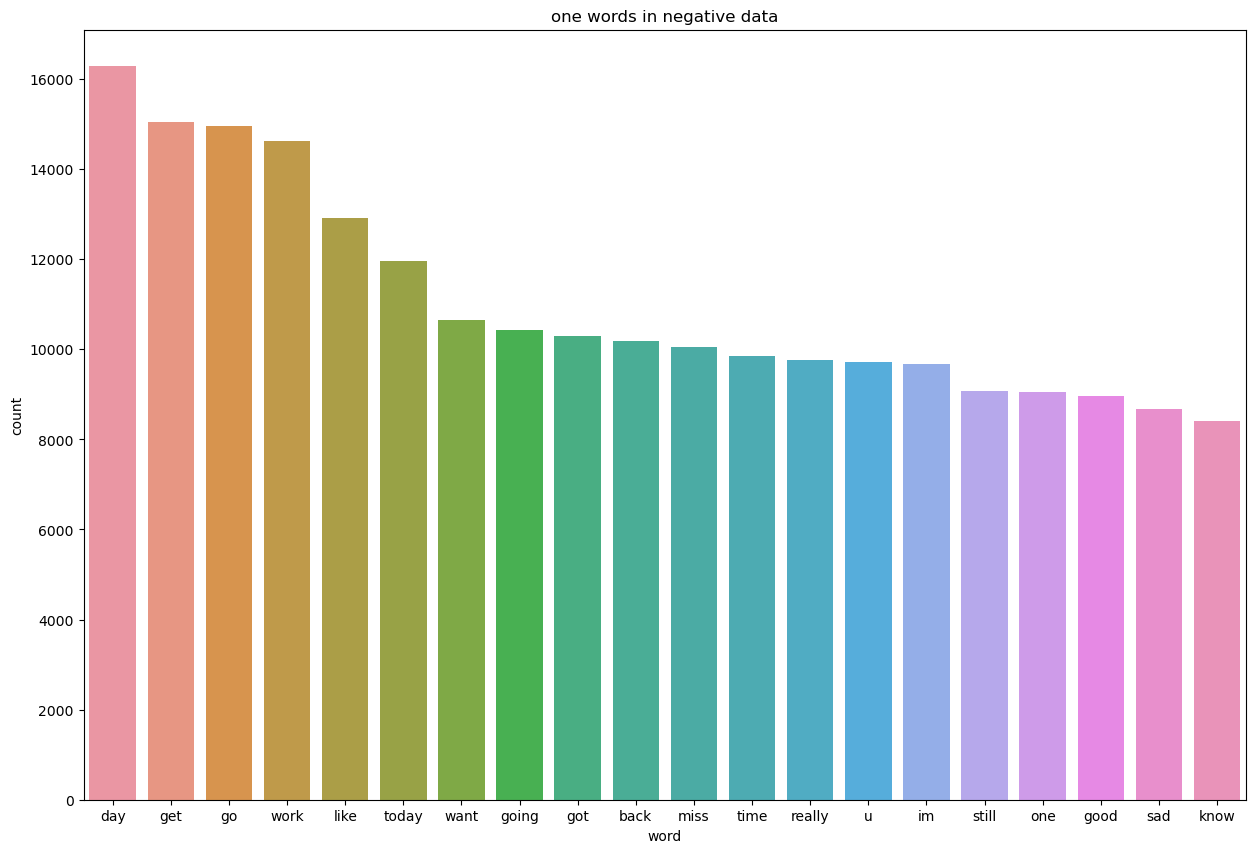

In [67]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x = count_corpus["word"][:20], y = count_corpus["count"][:20])
plt.title('one words in negative data')
plt.show()

In [70]:
count_corpus = get_count(negative_list)

# Print the word counts for the negative list
for word, count in count_corpus.items():
    print(f"Word: {word}, Count: {count}")


AttributeError: 'list' object has no attribute 'split'

In [72]:
def get_count(data):
    dic = {}
    for text in data:
        words = text.split()  # Split the text into words
        for word in words:
            if word not in dic:
                dic[word] = 1
            else:
                dic[word] += 1
    return dic

count_corpus = get_count(negative_list)

# Print the word counts for the negative list
for word, count in count_corpus.items():
    print(f"Word: {word}, Count: {count}")


AttributeError: 'list' object has no attribute 'split'

In [73]:
def get_count(data):
    dic = {}
    for sublist in data:
        for text in sublist:
            words = text.split()  # Split the text into words
            for word in words:
                if word not in dic:
                    dic[word] = 1
                else:
                    dic[word] += 1
    return dic

count_corpus = get_count(negative_list)

# Print the word counts for the negative list
for word, count in count_corpus.items():
    print(f"Word: {word}, Count: {count}")


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Word: thugh, Count: 1
Word: incisive, Count: 1
Word: mellebleu, Count: 1
Word: produktlizzy, Count: 1
Word: unbroken, Count: 1
Word: uhohspaghettioh, Count: 1
Word: matsj, Count: 1
Word: canonfail, Count: 1
Word: tinging, Count: 1
Word: pavlov, Count: 1
Word: hesa, Count: 1
Word: imdam, Count: 1
Word: cawowine, Count: 1
Word: caaannntt, Count: 1
Word: trhpeanut, Count: 1
Word: maxineboyle, Count: 1
Word: moneth, Count: 1
Word: photage, Count: 1
Word: wasserman, Count: 1
Word: emelypringrocks, Count: 1
Word: etheya, Count: 1
Word: pixelit, Count: 1
Word: weatehr, Count: 1
Word: julieryu, Count: 1
Word: cosi, Count: 1
Word: lilmissnancy, Count: 1
Word: subes, Count: 1
Word: springyboing, Count: 1
Word: latinnklover, Count: 1
Word: xoo, Count: 1
Word: yvie, Count: 2
Word: syuazimi, Count: 1
Word: misfitina, Count: 1
Word: alexanderspit, Count: 1
Word: kenwheaton, Count: 1
Word: somcak, Count: 1
Word: clockfort, Count: 1
Word: corykennedy, Count: 1
Word: whatchandrasaid, Count: 1
Word: th

In [74]:
def get_word_count(data):
    total_word_count = 0
    for text in data:
        words = text.split()  # Split the text into words
        total_word_count += len(words)
    return total_word_count

positive_word_count = get_word_count(positive_list)
negative_word_count = get_word_count(negative_list)

print(f"Total positive words: {positive_word_count}")
print(f"Total negative words: {negative_word_count}")


AttributeError: 'list' object has no attribute 'split'

In [75]:
def get_word_count(data):
    total_word_count = 0
    for text_list in data:
        for text in text_list:
            words = text.split()  # Split each text element into words
            total_word_count += len(words)
    return total_word_count

positive_word_count = get_word_count(positive_list)
negative_word_count = get_word_count(negative_list)

print(f"Total positive words: {positive_word_count}")
print(f"Total negative words: {negative_word_count}")


Total positive words: 1936152
Total negative words: 1915073
